In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

root_dir = 'covid-chestxray-dataset/'
image_dir = 'images/'

In [2]:
df = pd.read_csv('clean_data.csv')
df

,Unnamed: 0,patientid,finding,view,modality,filename
0,0,2,COVID-19,PA,X-ray,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,1,2,COVID-19,PA,X-ray,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,2,COVID-19,PA,X-ray,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,3,2,COVID-19,PA,X-ray,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,4,COVID-19,PA,X-ray,nejmc2001573_f1a.jpeg
...,...,...,...,...,...,...
530,943,478,No Finding,AP,X-ray,02b973e10caa192fd4e6825ad4aeaf_jumbo-10.jpeg
531,945,479,Pneumonia,AP,X-ray,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg
532,946,479,Pneumonia,AP,X-ray,ff33c406392b968d483174c97eb857_jumbo-9.jpeg
533,947,480,Pneumonia,PA,X-ray,000001-266.jpg


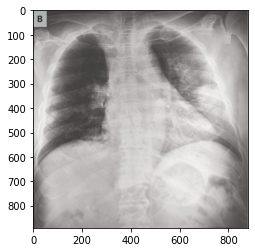

In [3]:
covid_df = df.loc[df['finding'] == 'COVID-19']
img_loc = root_dir + image_dir + covid_df.iloc[1]['filename']
covid_img = cv2.imread(img_loc)
plt.imshow(covid_img)

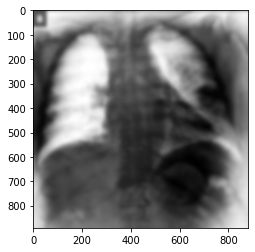

In [4]:
gray = cv2.cvtColor(covid_img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (0,0), 7)
inverted = cv2.bitwise_not(blur)
plt.imshow(inverted, cmap=plt.cm.gray)

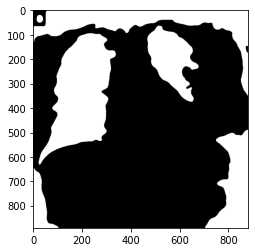

In [5]:
ret, th = cv2.threshold(inverted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th, cmap=plt.cm.gray)

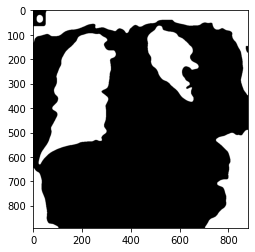

In [6]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(th, kernel, iterations=1)
dilation = cv2.erode(erosion, kernel, iterations=2)

opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap=plt.cm.gray)

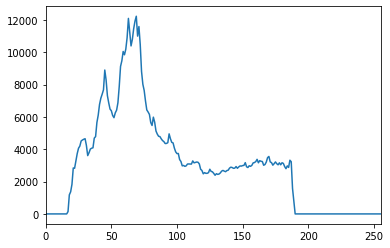

In [7]:
hist,bin = np.histogram(inverted.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.show()

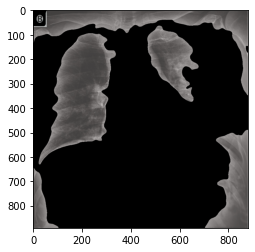

In [8]:
new_img = cv2.bitwise_and(covid_img, covid_img, mask = opening)
plt.imshow(new_img)